# CH 4 - Activation Functions

- P 72 - 110

---

- The Step Activation Function
- The Linear Activation Function
- The Sigmoid Activation Function
- The Rectified Linear (ReLU) Activation Function
- Why Use Activation Functions?
- Linear Activation in the Hidden Layers
- ReLU Activation in a Pair of Neurons
- ReLU Activation in the Hidden Layers
- ReLU Activation Function Code
- The Softmax Activation Function

---

# Questions/Further Explore
1. Expectation vs Normalization
2. Why ReLU
3. Why keepdims should be True
---
---

## Background
- Diff (AF)s for diff cases
- Understanding them will help me pick which is best for the task
- (AF) is applied to the output of a neuron (or layer of neurons)
    - $\therefore$ modifies output
- Why use (AF)s : 
    - Allows for NN to map nonlinear functions if (AF) is nonlinear

In [5]:
import numpy as np
import matplotlib.pyplot as plt

--- 

## The Step Activation Function

- Purpose of this (AF) is to mimic a neuron “firing” or “not firing” based on input information
- In a single neuron, weights * inputs + bias can result in a value > 0 :

\begin{equation}
y = 
    \left\{
    \begin{array}{ll}
        1 & x\gt 0 \\ 
        0 & x\leq 0 \\
    \end{array} 
\right\}
\end{equation}
- Problem : 
    - Less clear to the optimizer on impacts of weights and biases 
    - Hard to tell how "close" this step func was to activating or deactivating
    - $\therefore$ less granular and less informative

In [3]:
def binaryStep(x):
    ''' It returns '0' is the input is less then zero otherwise it returns one '''
    return np.heaviside(x, 1)

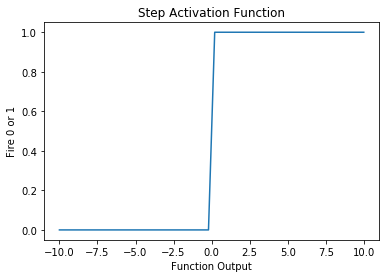

In [6]:
# linspace = return evenly spaced numbers over a specified interval.

x = np.linspace(-10, 10)
plt.plot(x, binaryStep(x))
plt.axis('tight')
plt.title('Step Activation Function')
plt.xlabel('Function Output')
plt.ylabel('Fire 0 or 1')
plt.show()

---

## The Linear Activation Function

- The eq of a line
- y = x :: output = input
- Usually applied to the last layer's output in the case of a regression model - a model that outputs a scalar value instead of a classification

In [29]:
def linear(x): 
    return x

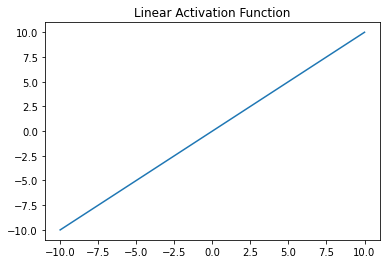

In [30]:
x = np.linspace(-10, 10)
plt.plot(x, linearstep(x))
plt.axis('tight')
plt.title('Linear Activation Function')
plt.show()

---

## The Sigmoid Activation Function

- Clearer to the optimizer on impacts of weights and biases compared to the step function
- Easier to tell how "close" this func is to activating or deactivating
- $\therefore$ more granular and more informative
    - Better to have in the hidden layer compared to the step function but ReLU has replaced both for hidden layer
    - Best to use this as the output
- y = 1 / 1 + e$^{-x}$

In [13]:
def sigmoid(x):
    y = 1/ (1 + np.exp(-x))
    return y

In [14]:
sigmoid(-30)

9.357622968839299e-14

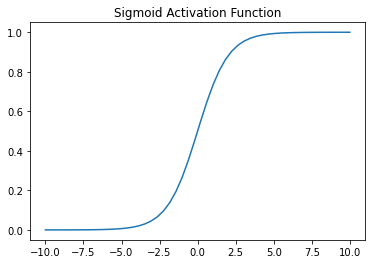

In [50]:
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Sigmoid Activation Function')
plt.show()

---

## The Rectified Linear (ReLU) Activation Function
- Preferred over other nonlinear (AF)s bc of speed and efficiency 
- Sigmoid is more difficult to compute
- Although nonlinear, it's close to being a linear (AF) bc of the bend at 0

\begin{equation}
y = 
    \left\{
    \begin{array}{ll}
        x & x\gt 0 \\ 0 & x\leq 0 \\
    \end{array} 
\right\}
\end{equation}

In [12]:
def relu(x):
    x1 = []
    for i in x:
        if i < 0:
            x1.append(0)
        else:
            x1.append(i)
    
    return x1

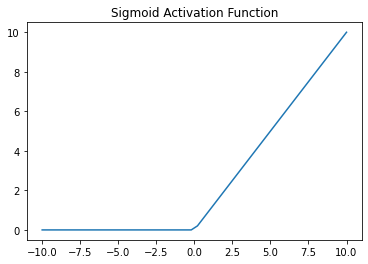

In [41]:
x = np.linspace(-10, 10)
plt.plot(x, relu(x))
plt.axis('tight')
plt.title('Rectified Linear Activation Function')
plt.show()

---

## Why Use Activation Functions?
- For a NN to fit a nonlinear function, we need it to contain two or more hidden layers, and we need those hidden layers to use a nonlinear (AF).
- Nonlinear function cannot be represented well by a straight line, such as a sine function
- Main attraction for NNs has to do with their ability to solve nonlinear problems

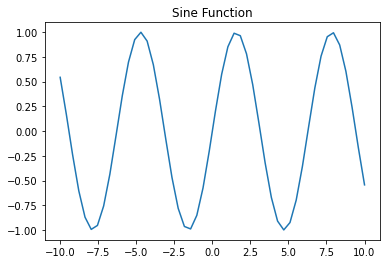

In [91]:
x = np.linspace(-10, 10)
plt.plot(x, np.sin(x))
plt.axis('tight')
plt.title('Sine Function')
plt.show()

---
## Linear Activation in the Hidden Layers

- Will ! be effective as in when updating the weights and bias, we will always get a linear value y = x
- See images
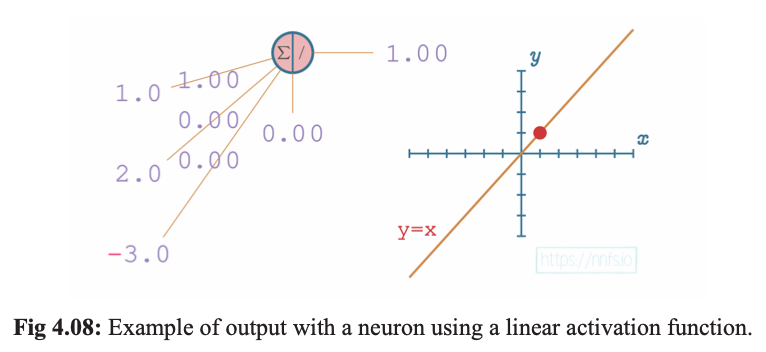
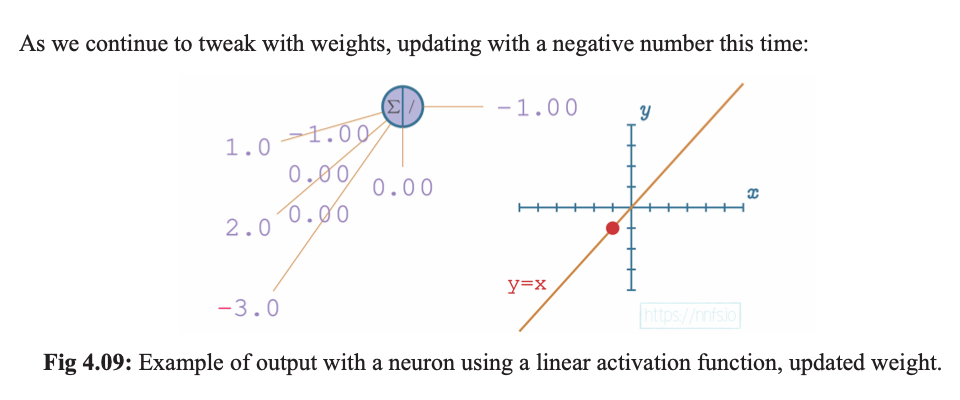
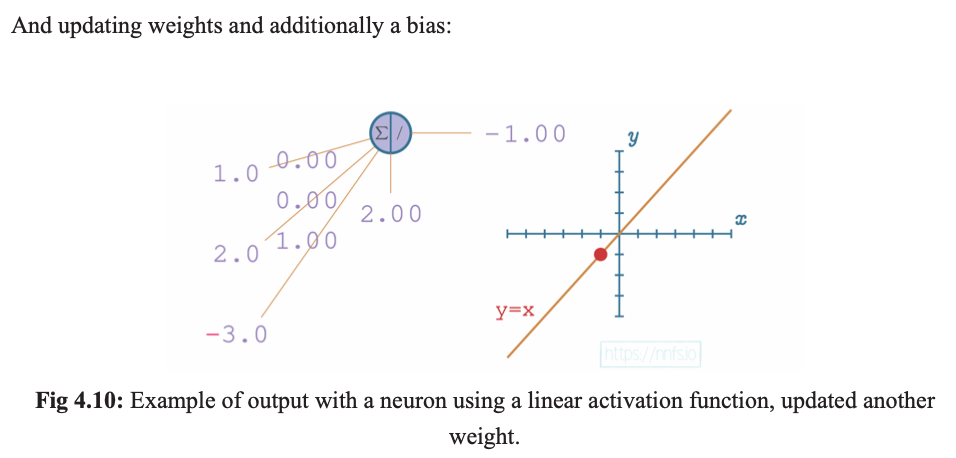
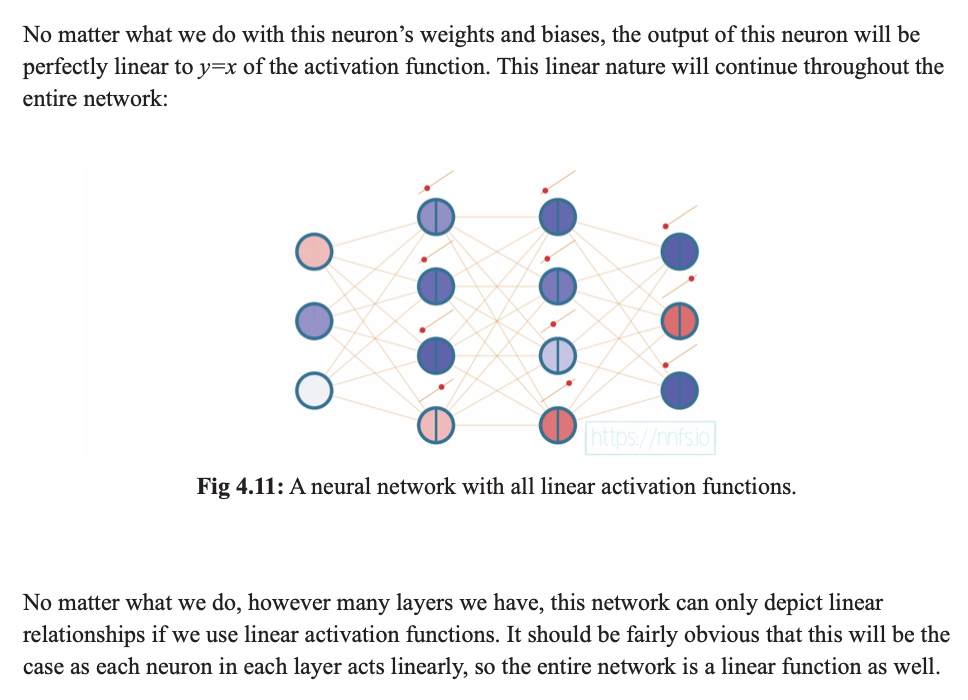


---

## ReLU Activation in a Pair of Neurons

- Weights will adjust the angle of the line
    - w = 0, straight line across x-axis, $\therefore$ line will ! cross y-axis at all
    - w $\gt$ 0, line will be linear starting at 0 (when bias is 0) in the frist quadrant (+x, +y)
    - w $\lt$ 0, line will be linear starting at 0 (when bias is 0) in the second quadrant (-x, +y)
- Bias will adjust the positioning on the x-axis (shift left or right)
    - b = 0, straight line w/ no shift, $\therefore$ line will start at 0 on the x-axis
    - b $\gt$ 0, shift line left to activate at that b value; neuron activates earlier
    - (?) no example of a -b so is that not a thing?

## ReLU Activation in the Hidden Layers
- Dense layer $\equiv$ **fully-connected** or **fc** [**all** neurons in first hidden layer connect to all neurons in the next layer]
- ! densely connected [**! all** neurons from the first hidden layer connects to all neurons in the next layer]
- More neurons can enable more unique areas of effect bc ReLU works on a per-neuron basis
- Need two or more hidden layers bc the 2nd layer bias will adjust the height
- Nonlinear activation functions map nonlinear problems
- Cons
    - Unbounded
    - ! normalized with other units implies the values can be anything
    - Exclusive means each output is independent of the others

## ReLU Activation Function Code

In [6]:
import nnfs
from nnfs.datasets import spiral_data

In [7]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = []

for i in inputs: 
    if i > 0:
        outputs.append(i)
    else:
        outputs.append(0)
print(outputs)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [8]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = []

for i in inputs: 
    outputs.append(max(0, i))
print(outputs)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [22]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100] 
output = np.maximum(0, inputs) 
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [23]:
# Dense layer
class Layer_Dense:
    
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        print("self.weights shape : ", np.shape(self.weights))
        # Row vector 
        self.biases = np.zeros((1, n_neurons))
        print("self.biases shape : ", np.shape(self.biases))
    
    # Forward pass
    def forward(self, inputs):
        print("inputs shape : ", np.shape(inputs))
        self.output = np.dot(inputs, self.weights) + self.biases
        print("self.output Dense shape : ", np.shape(self.output))

In [29]:
nnfs.init()

In [30]:
"""
4
"""
# ReLU activation
class Activation_ReLU:
    
    # Forward pass
    def forward(self, inputs):
        # why inputs?
        self.output = np.maximum(0, inputs)
        print("self.output ReLU shape : ", np.shape(self.output))

In [31]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values 
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer): 
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer 
dense1.forward(X)

# Forward pass through activation func. 
# Takes in output from previous layer 
activation1.forward(dense1.output)

# Let's see output of the first few samples:
print(activation1.output[:5])

self.weights shape :  (2, 3)
self.biases shape :  (1, 3)
inputs shape :  (300, 2)
self.output Dense shape :  (300, 3)
self.output ReLU shape :  (300, 3)
[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


## The Softmax Activation Function
- Apply to output layer
- Can take in non-normalized, or uncalibrated, inputs and produce a normalized distribution of probabilities
- In the case of **classification**, what we want to see is a prediction of which class the network “thinks” the input represents. This distribution returned by this (AF) represents confidence scores for each class and will **add up to 1**
    - Compare this to ReLU : an output of [12, 99, 318] is w/ out context
    - Here : an output of [0.45, 0.55], w/ context 
        - The prediction is the 2nd class, but the **confidence** in this prediction isn’t very high
- What and Why Exponential
    - Euler's #, e
    - Referred to as the "exponential growth" #
    - To calc the pr()s, we need non-(-) (so all (+)) values bc (-) **pr()/confidence** doesn't make sense
    - Monotonic func as in higher input values leads to higher output values
    - Adds stability to the result as the normalized exponentiation is more about the difference between numbers than their magnitudes
    - Divide by the sum so it'll convert values to a pr() dist which then can add up to 1
- axis attribute of func - np.sum() in a 2D array/Matrix :
    - 0 : rows which we DON'T WANT
    - 1 : columns which we DO WANT bc we're trying to sample all the outputs from a layer for each sample in a batch
- keepdims attribute of func - np.sum() in a 2D array/Matrix :
    - To keep the same dims of the input

In [42]:
# Values from the previous output
layer_outputs = [4.8, 1.21, 2.385]

# e - mathematical constant, E to match common coding 
# style where constants are uppercased
E = 2.71828182846

# For each value in the vector, calc te exponential value
exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output)
    
print(exp_values)
print(E ** float('-inf'))
print(E ** 0)

[121.51041751893969, 3.3534846525504487, 10.85906266492961]
0.0
1.0


In [44]:
norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    norm_values.append(value / norm_base)
    
print(norm_values, sum(norm_values))

[0.8952826639573506, 0.024708306782070668, 0.08000902926057876] 1.0


In [50]:
'''
Similar but faster to calc w/ np
'''

# Values from the previous output
layer_outputs = [4.8, 1.21, 2.385]

# For each value in the vector, calc te exponential value
exp_values = np.exp(layer_outputs)
print(exp_values)

norm_values = exp_values / np.sum(exp_values)
print(norm_values, sum(norm_values))

[121.51041752   3.35348465  10.85906266]
[0.89528266 0.02470831 0.08000903] 0.9999999999999999


In [82]:
'''
Impact of axis
Why : to know how to train in batches
'''

# CH 2 : inputs x transpose(weight) + bias
inputs = [
          [1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]
         ]
x = np.array(inputs)

weights = [
           [0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]
          ]
w = np.array(weights)
biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(x, w.T) + biases
output = np.round(layer_outputs, 3)

print(np.shape(output), "output : \n", output)

# CH 4 : compare output by the axis
print('\nSum w/ out axis')
print(np.sum(output))

print('\nSum w/ axis = None')
print(np.sum(output, axis=None))

print('\nSum w/ axis = 0, sum across the row; 4.8 + 8.9 + 1.41 = 15.11 - DONT WANT')
print(np.sum(output, axis=0))

print('\nSum w/ axis = 1, sum across the col; 4.8 + 1.21 + 2.385 = 8.395 - DO WANT w/ axis')
print(np.sum(output, axis=1))

print('\nSum w/ axis = 1, keepdims = True; DO WANT w/ both axis & keepdims')
print(np.sum(output, axis=1, keepdims=True))

(3, 3) output : 
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]

Sum w/ out axis
18.172

Sum w/ axis = None
18.172

Sum w/ axis = 0, sum across the row; 4.8 + 8.9 + 1.41 = 15.11 - DONT WANT
[15.11   0.451  2.611]

Sum w/ axis = 1, sum across the col; 4.8 + 1.21 + 2.385 = 8.395 - DO WANT w/ axis
[8.395 7.29  2.487]

Sum w/ axis = 1, keepdims = True; DO WANT w/ both axis & keepdims
[[8.395]
 [7.29 ]
 [2.487]]


In [74]:
''' 
Train in batches, such that it outputs in batches
'''

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

# Get unnormalized pr()s
exp_values = np.(inputs)

# Normalize for each sample
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

SyntaxError: invalid syntax (2967159366.py, line 8)